# Importing all the libraries

In [4]:
# Import necessary libraries
import os
import zipfile
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


In [5]:

# Extract the dataset
zip_path = 'Dataset.zip'
extract_path = '/home/manishji/Smart_Mathematics_Tutor/Dataset'
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset already extracted.")

# Check if the dataset directory is not empty
if not os.listdir(extract_path):
    raise ValueError("The dataset directory is empty. Please check the extraction path and dataset.")

# Ensure the directory structure is correct
for root, dirs, files in os.walk(extract_path):
    if not dirs:
        raise ValueError("The dataset directory structure is incorrect. Each class should have its own subdirectory.")

# Define image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the training dataset (80% for training)
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load the validation dataset (20% for validation)
val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Print dataset sizes and class labels
print(f"Training Samples: {train_generator.samples}")
print(f"Validation Samples: {val_generator.samples}")
print(f"Class labels: {train_generator.class_indices}")

# Check if any of the datasets are empty
if train_generator.samples == 0:
    raise ValueError("The training dataset is empty. Please check the dataset directory and ensure it contains images.")
if val_generator.samples == 0:
    raise ValueError("The validation dataset is empty. Please check the dataset directory and ensure it contains images.")

# Define the model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(len(train_generator.class_indices), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and summarize the model
model = build_model()
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator, steps=val_generator.samples // BATCH_SIZE)
print(f'Validation accuracy: {accuracy}')

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Save the trained model
model.save('trained_model_with_early_stopping.h5')

# Load the trained model
model = load_model("trained_model_with_early_stopping.h5")

# Predict on new images
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    pred = np.argmax(model.predict(x))
    return pred

# Example usage
index = ['circle', 'square', 'triangle']
img_path = "/home/manishji/Downloads/100.png"
prediction = index[predict_image(img_path)]
print(f'Prediction: {prediction}')

Dataset already extracted.


ValueError: The dataset directory structure is incorrect. Each class should have its own subdirectory.

# Image Data Augumentation

In [6]:
 #Extract the dataset
zip_path = 'Dataset.zip'
extract_path = '/home/manishji/Smart_Mathematics_Tutor/Dataset'
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset already extracted.")


Dataset already extracted.


# Building the model

In [7]:
# Define image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the training dataset (80% for training)
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load the validation dataset
val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Print dataset sizes and class labels
print(f"Training Samples: {train_generator.samples}")
print(f"Validation Samples: {val_generator.samples}")
print(f"Class labels: {train_generator.class_indices}")

# Check if any of the datasets are empty
if train_generator.samples == 0:
    raise ValueError("The training dataset is empty. Please check the dataset directory and ensure it contains images.")
if val_generator.samples == 0:
    raise ValueError("The validation dataset is empty. Please check the dataset directory and ensure it contains images.")


Found 8994 images belonging to 1 classes.
Found 2248 images belonging to 1 classes.
Training Samples: 8994
Validation Samples: 2248
Class labels: {'Dataset': 0}


In [8]:
# Define image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the training dataset (80% for training)
train_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load the validation dataset (20% for validation)
val_generator = train_datagen.flow_from_directory(
    extract_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)    
# Print dataset sizes
print(f"Training Samples: {train_generator.samples}")
print(f"Validation Samples: {val_generator.samples}")


Found 8994 images belonging to 1 classes.
Found 2248 images belonging to 1 classes.
Training Samples: 8994
Validation Samples: 2248


# Fitting the model

In [9]:
# Define the model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),
        
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(len(train_generator.class_indices), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Build and summarize the model
model = build_model()
model.summary()


/home/manishji/Smart_Mathematics_Tutor/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-19 17:46:20.248506: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-03-19 17:46:20.406295: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-03-19 17:46:20.421390: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-03-19 17:46:20.431987: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free s

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,940,449 (41.73 MB)

 Trainable params: 10,938,785 (41.73 MB)

 Non-trainable params: 1,664 (6.50 KB)

# Saving the model

In [11]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=20,  # Reduced number of epochs
    callbacks=[early_stopping, model_checkpoint]
)

/home/manishji/Smart_Mathematics_Tutor/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/home/manishji/Smart_Mathematics_Tutor/.venv/lib/python3.12/site-packages/keras/src/ops/nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/home/manishji/Smart_Mathematics_Tutor/.venv/lib/python3.12/site-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
2025-03-19 17:46:29.498623: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-03-19 17:46:32.599748: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 92160000 

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00

/home/manishji/Smart_Mathematics_Tutor/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


281/281 ━━━━━━━━━━━━━━━━━━━━ 923s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
  1/281 ━━━━━━━━━━━━━━━━━━━━ 13:43 3s/step - accuracy: 1.0000 - loss: 0.0000e+00

/home/manishji/Smart_Mathematics_Tutor/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 121ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1339s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 122ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 767s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 118ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [12]:
 #Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator, steps=val_generator.samples // BATCH_SIZE)
print(f'Validation accuracy: {accuracy}')


70/70 ━━━━━━━━━━━━━━━━━━━━ 32s 457ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation accuracy: 1.0


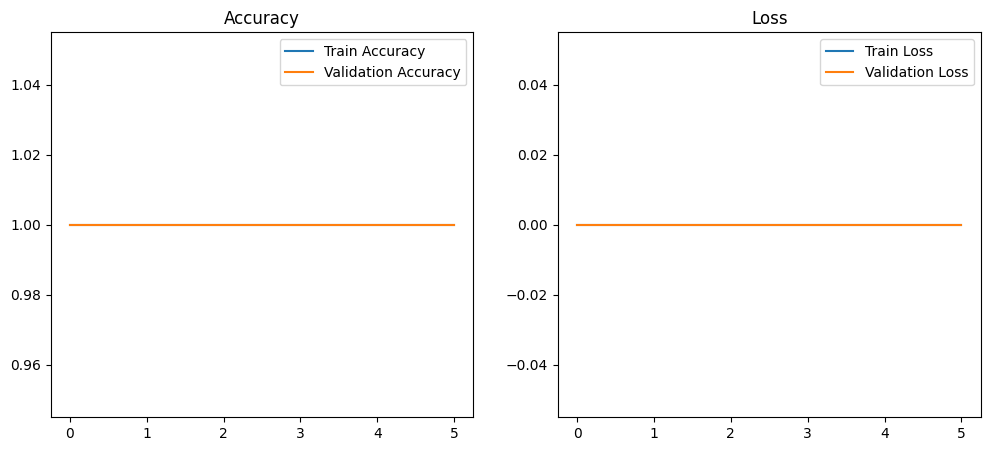

In [13]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [14]:
# Save the trained model
model.save('trained_model_with_early_stopping.keras')

# Load the trained model
model = load_model("trained_model_with_early_stopping.keras")


In [15]:

# Predict on new images
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    pred = np.argmax(model.predict(x))
    return pred


In [17]:
# Example usage
index = ['circle', 'square', 'triangle']
img_path = "/home/manishji/Downloads/s.png"
prediction = index[predict_image(img_path)]
print(f'Prediction: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Prediction: circle


/home/manishji/Smart_Mathematics_Tutor/.venv/lib/python3.12/site-packages/keras/src/ops/nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
